# Multilayer Perceptron -  Manual - Cross Validation

### Importação das bibliotecas necessárias

In [1]:
import pandas as pd
from random import randint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.svm import SVC

### Carregamento da base

In [2]:
NomeBase = "GLCM50"
NomeBase = "Haralick50"
#NomeBase = "LBP50r_1_5_p_12"
#NomeBase = "LBP50r_1_p_4"
#NomeBase = "LBP50r_1_p_8"
#NomeBase = "LBP50r_2_p_16"
#NomeBase = "LBP50r_3_p_24"
#NomeBase = "MomentosHu50"
#NomeBase = "MomentosEstatisticos50"
#NomeBase = "MomentosCentrais50"


valor = 3
base = pd.read_csv('../Datasets/Base' + str(NomeBase)+'.txt', header=None)
entradas = base.iloc[:, 0:len(base.columns) -valor].values 
classes = base.iloc[:,len(base.columns)-valor].values
classesErro = base.iloc[:,len(base.columns)-valor+1].values
NumColunas = len(base.columns) - valor
print(classes)


[0 0 0 ... 1 1 1]


### Padronização dos dados

In [3]:
for i in range (len(base.columns)-valor):
    entradas[:,i] = (entradas[:,i] - np.mean(entradas[:,i]))/entradas[:,i].std(axis = 0)

In [4]:
labelEncoder = LabelEncoder()
classes = labelEncoder.fit_transform(classes)

### Divisão da base em treinamento (80%) e teste (20%)

In [5]:
def dividir_trei_test(entradas, classes, classesErro, percentual):
    result = []
    while (len(result)) != len(entradas):
        r = randint(0, len(entradas)-1)
        if r not in result:
            result.append(r)    

    repeticoes = np.zeros(np.max(classes)+1)
    
    for i in range(len(entradas)):
        repeticoes[classes[i]] = repeticoes[classes[i]] + 1
    repeticoes = np.array(repeticoes)
    minimo = int(np.min(repeticoes) * (1 - percentual))
    
    treino = int((minimo) * (np.max(classes)+1) )
    teste = int(len(entradas) - treino)

    entradas_trei = np.zeros((treino, NumColunas))
    entradas_test = np.zeros((teste, NumColunas))
    classes_trei = np.zeros((treino)) 
    classes_test = np.zeros((teste))
    classeErro_trei = np.zeros((treino))
    classeErro_test = np.zeros((teste))
 
    contTreino = 0
    contTest = 0
    vetorMinimo = np.zeros(np.max(classes)+1)

    for i in range(len(classes)):    
        if (vetorMinimo[classes[result[i]]] < minimo):            
            entradas_trei[contTreino] = entradas[result[i]]
            classes_trei[contTreino] = classes[result[i]]
            classeErro_trei[contTreino] = classesErro[result[i]]
            contTreino = contTreino + 1
            vetorMinimo[classes[result[i]]] = vetorMinimo[classes[result[i]]] + 1
            
        else:   
            entradas_test[contTest] = entradas[result[i]]            
            classes_test[contTest] = classes[result[i]]
            classeErro_test[contTest] = classesErro[result[i]]
            contTest = contTest + 1        


    return entradas_trei, entradas_test, classes_trei, classes_test, classeErro_trei, classeErro_test

In [6]:
labelEncoder = LabelEncoder()
classes = labelEncoder.fit_transform(classes)
NumClasses = np.max(classes) + 2

entradas_trei, entradas_test, classes_t, classes_te, classeErro_trei, classeErro_test  = dividir_trei_test(entradas, classes, classesErro, 0.2)
print(entradas_test)
print(classes_t)

[[-3.47311902 -0.00713486  1.12919697 ...  2.88322794 -0.64620797
   2.40190696]
 [-2.39075792 -0.06005063  0.72931536 ...  2.02099648 -0.40324324
   1.69095718]
 [-1.61571768 -0.08713522  1.00936069 ...  1.42765491 -0.70552253
   1.59406567]
 ...
 [-0.89888006  3.41936069  1.00370715 ...  1.83769195 -1.89649082
   2.52582782]
 [ 0.58096752 -0.14585076 -1.02976715 ... -0.61793155  1.02098774
  -0.91811523]
 [-0.82678822 -0.11172641  0.31412258 ...  0.80218255 -0.12636642
   0.67410899]]
[0. 0. 0. ... 0. 0. 0.]


## Kernels:
#### linear
#### poly
#### sigmoid
#### rbf = tem tendências as melhores resultados

In [7]:
k = "rbf"
classificador = SVC(kernel= k, random_state = 1, C = 2.0, gamma='auto')

In [8]:
classificador.fit(entradas_trei, classes_t)

SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [9]:
previsoes = classificador.predict(entradas_test)

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):   

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Saída correta')
    plt.xlabel('Saída encontrada')    

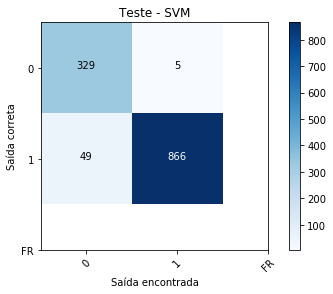

In [11]:
cm = confusion_matrix(classes_te, previsoes)
plot_confusion_matrix(cm, 
                      classes=['0', '1', 'FR'],
                      title='Teste - SVM')
plt.show()

IndexError: too many indices for array

In [14]:
print("Kernel " + str(k))
cont = 0
errosTest = []
errosTestC = []
for i in range (len(classes_te)):
    if (classes_te[i] != previsoes[i] and previsoes[i] != 2):
        cont += 1
        errosTest.append(classes_te[i])
        errosTestC.append(classeErro_test[i])
        

print("Quantidade de erros "+ str(cont))
print("Total " + str(len(classes_te)))
print("Erros Normal e Falha" )
print({x:errosTest.count(x) for x in set(errosTest)})
print("Erros por classe" )
print({x:errosTestC.count(x) for x in set(errosTestC)})
erro = (cont * 100)/len(classes_te)
print("Percentual de acerto "+ str(100 - erro))
print("Percentual de erro "+ str(erro))

Kernel rbf
Quantidade de erros 54
Total 1249
Erros Normal e Falha
{0.0: 5, 1.0: 49}
Erros por classe
{0.0: 5, 3.0: 2, 4.0: 42, 6.0: 1, 7.0: 1, 8.0: 1, 9.0: 1, 10.0: 1}
Percentual de acerto 95.6765412329864
Percentual de erro 4.323458767013611
